# DPM & MFM Roundup

## Methods
Default parameters:
- All DPM methods default to alpha=1.0 unless otherwise specified.
- All MFM methods default to using a poisson(k) prior unless otherwise specified.

| name | description |
|--|--|
| dpm_gibbs | DPM using gibbs sampler |
| dpm_sm | DPM using split merge only |
| dpm_hybrid | DPM using hybrid (5,1) sampler |
| dpm_eb | DPM using empirical bayes updates |
| dpm_eb_gibbs | DPM using empirical bayes updates and gibbs sampling only |
| dpm_small_alpha | DPM using alpha=0.1 |
| dpm_big_alpha | DPM using alpha=10 |
| mfm_gibbs | MFM using gibbs sampler |
| mfm_sm | MFM using split merge only |
| mfm_hybrid | MFM using hybrid (5,1) sampler |
| mfm_prior_low | MFM with a poisson(k - 2) prior |
| mfm_prior_high | MFM with a poisson(k + 2) prior |

## Definitions
- NMI: Normalized Mutual Information
- Rand score: Adjusted Rand Index
- Aggregation score: measure of tendency to cluster points that should be in the same cluster together:
$$\mathbb{P}[\mathbf{z}_i = \mathbf{z}_j | \mathbf{Z}_i = \mathbf{Z}_j]$$
- Segregation score: measure of tendency to separate points that should be in different clusters:
$$\mathbb{P}[\mathbf{z}_i \neq \mathbf{z}_j | \mathbf{Z}_i \neq \mathbf{Z}_j]$$
- Oracle: clustering algorithm with perfect knowledge of model parameters (i.e. cluster means, weights, covariance) but no knowledge of individual point assignments
- Oracle Normalized (metric): metric normalized by dividing the algorithm score by the oracle clustering score on that metric
- EB: abbreviation for empirical bayes

## Columns
|column|description|
|--|--|
| rand | Rand score of result |
| nmi | NMI score of result |
| oracle_rand | Rand score of Oracle clustering |
| oracle_nmi | NMI of Oracle clustering |
| num_clusters | Number of clusters in result |
| best_idx | Index of 'best' configuration according to least squares. Useful for loading the clustering configuration without recomputing the least squares configuration. |
| aggregation | Aggregation score |
| segregation | Segregation score |
| oracle_aggregation | Oracle aggregation score |
| oracle_segregation | Oracle segregation score |
| iterations | Number of iterations run. NOTE: runs where the number of clusters 'blew up' (>100) were terminated, and are reflected here. |
| method | Method used. See the 'methods' section. |
| d | Number of dimensions |
| p | Number of points |
| k | Number of clusters |
| r | Ratio of weights; the nth cluster has weight proportional to $r^n$. |
| id | Run ID (uuid4) |


## Setup

In [148]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

from analysis_toolkit import setup_latex, util
from analysis_toolkit import definitions as defs

summary = pd.read_csv('summary.csv', dtype=defs.COLUMNS)
setup_latex()

In [152]:
import bmcc

BASE = 'd=8,p=1920,k=3,r=0.8/794c1531-6a0f-4d79-a89c-e4c004425d21.npz'

dataset = bmcc.GaussianMixture('./phase_1/data/' + BASE, load=True)
hist = np.load('./phase_1/results/dpm_eb_gibbs/' + BASE)['hist']

res = bmcc.LstsqResult(dataset.data, hist, burn_in=int(hist.shape[0] / 2))
res.evaluate(dataset.assignments, oracle=dataset.oracle, oracle_matrix=dataset.oracle_matrix)

# fig, ax = plt.subplots(1, 1)
# ax.plot(np.arange(hist.shape[0]) * 5, [np.max(x) for x in hist])
# ax.axhline(3, color='C1')
# ax.set_xlabel('Iteration')
# ax.set_ylabel('Number of Clusters in Sample')

# fig.savefig('794c1531-6a0f-4d79-a89c-e4c004425d21_nc.pdf', bbox_inches='tight')

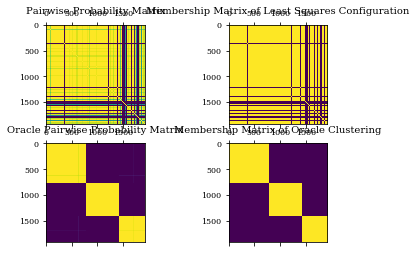

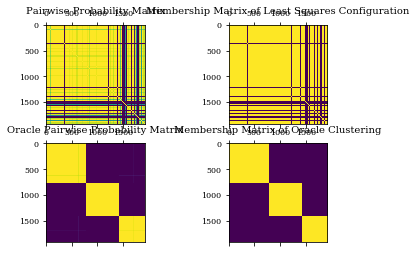

In [157]:
import matplotlib
matplotlib.rcParams.update({'text.usetex': False})

res.matrices()

In [35]:
FIG_TEXT = r"""
\begin{{figure}}[H]
    \centering
    \includegraphics[width=0.8\textwidth]{{plots/d={d},p={p},k={k},metric={metric},plot={plot}.pdf}}
    \caption{{{metric_desc} | {d} Dimensions, {k} Clusters ({p} Points) | {plot_desc}}}
    \label{{fig:{metric}_d{d}_k{k}_{plot}}}
\end{{figure}}"""

for d, k in [(3, 3), (3, 5), (3, 8), (5, 3), (8, 3)]:
    for plot, desc in [('boxplot', 'Boxplot of 100 Runs'), ('se_intervals', '2SE Intervals; arrow denotes intervals less than 0.8')]:
        for metric, metric_desc in [('rand', 'Oracle Normalized Rand Score'), ('nmi', 'Oracle Normalized NMI')]:
            print(FIG_TEXT.format(
                d=d, k=k, p=d * k * 80, plot=plot,
                metric=metric, metric_desc=metric_desc, plot_desc=desc))



\begin{figure}[H]
    \centering
    \includegraphics[width=0.8\textwidth]{plots/d=3,p=720,k=3,metric=rand,plot=boxplot.pdf}
    \caption{Oracle Normalized Rand Score | 3 Dimensions, 3 Clusters (720 Points) | Boxplot of 100 Runs}
    \label{fig:rand_d3_k3_boxplot}
\end{figure}

\begin{figure}[H]
    \centering
    \includegraphics[width=0.8\textwidth]{plots/d=3,p=720,k=3,metric=nmi,plot=boxplot.pdf}
    \caption{Oracle Normalized NMI | 3 Dimensions, 3 Clusters (720 Points) | Boxplot of 100 Runs}
    \label{fig:nmi_d3_k3_boxplot}
\end{figure}

\begin{figure}[H]
    \centering
    \includegraphics[width=0.8\textwidth]{plots/d=3,p=720,k=3,metric=rand,plot=se_intervals.pdf}
    \caption{Oracle Normalized Rand Score | 3 Dimensions, 3 Clusters (720 Points) | 2SE Intervals; arrow denotes intervals less than 0.8}
    \label{fig:rand_d3_k3_se_intervals}
\end{figure}

\begin{figure}[H]
    \centering
    \includegraphics[width=0.8\textwidth]{plots/d=3,p=720,k=3,metric=nmi,plot=se_intervals.pdf}

In [12]:
boxplots('rand', title=False, save=True)

AttributeError: 'list' object has no attribute 'iterrows'

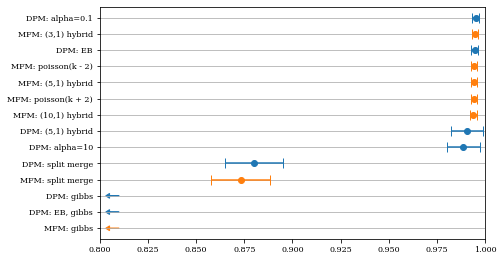

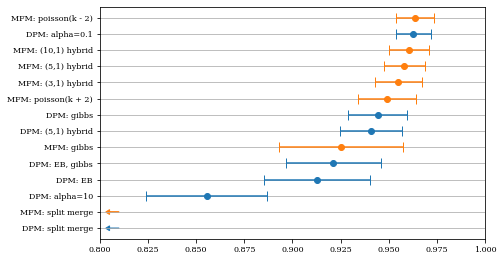

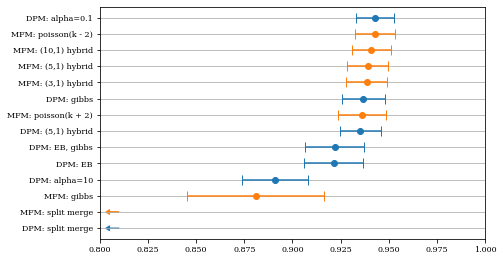

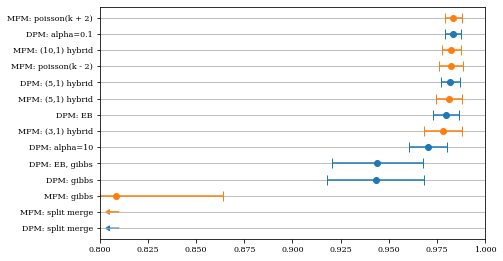

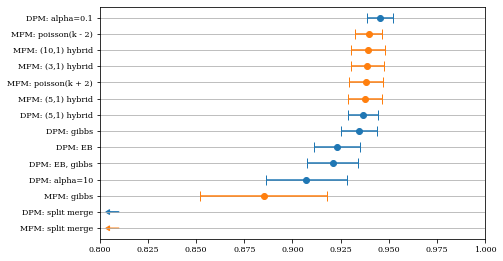

In [20]:
se_intervals('rand', title=False, save=True)

d       3
p    1200
k       5
Name: 200, dtype: uint16


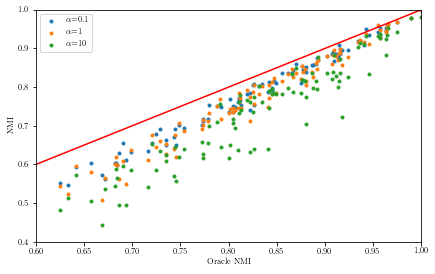

In [90]:


def scatter_alpha(t):

    fig, ax = plt.subplots(1, 1)

    minx = 1
    miny = 1
    for method, alpha in DPM_ALPHA_METHODS.items():
        df = filter(summary, method=method, **t)
        ax.scatter(df['oracle_nmi'], df['nmi'], marker='.', label=r"$\alpha$={}".format(alpha))
        minx = min(min(df['oracle_nmi']), minx)
        miny = min(min(df['nmi']), miny)

    st = max(minx, miny)
    ax.set_xlim(0.6, 1)
    ax.set_ylim(0.4, 1)
    ax.plot([st, 1], [st, 1], color='red')
    ax.set_xlabel('Oracle NMI')
    ax.set_ylabel('NMI')
    ax.legend()
    
    plt.savefig('d=3,p=1200,k=5,metric=nmi,plot=scatter.pdf', bbox_inches='tight')


scatter_alpha(TESTS.iloc[2])
print(TESTS.iloc[2])
    

In [14]:
def ag_sg(t, fig, left, right):

    fig.tight_layout()
    boxplot('aggregation', t, left, sortkey='rand')
    boxplot('segregation', t, right, sortkey='rand')
    plt.setp(right.get_yticklabels(), visible=False)
    left.set_title("Aggregation Score")
    right.set_title("Segregation Score")

def ag_sg_all():
    for _, t in TESTS.iterrows():
        fig, (left, right) = plt.subplots(1, 2)
        fig.suptitle(
            "{d:d} Dimensions, {p:d} Points, {k:d} Clusters"
            "  |  Sorted by Rand Score".format(**t), y=1.05, fontsize=16)

        ag_sg(t, fig, left, right)
